# Machine Problem 1

In [3243]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [3244]:
# put your answer here
df = pd.read_csv('food.csv')

1. Remove all duplicates in the dataset

In [3245]:
# put your answer here
df.drop_duplicates(inplace = True)

2. Use the `isnull()` and `.any()` function to check for NaN values in each column

In [3246]:
# put your answer here
df.isnull().any()

GPA                  True
Gender              False
breakfast           False
calories_chicken    False
calories_day         True
                    ...  
type_sports          True
veggies_day         False
vitamins            False
waffle_calories     False
weight               True
Length: 61, dtype: bool

3. Retrive all rows with NaN values in the dataset by using `isnull()` and `.any()` inside a dataframe

In [3247]:
df[df.isnull().any(axis=1)]

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,2,1315,190
8,3.3,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,...,2.0,2.0,5,725.0,345,none,3,2,760,180
15,NaN,2,2,430,NaN,980.0,2,"cookies, donuts, candy bars",boredom,2.0,...,2.0,1.0,1,940.0,345,Hockey,1,2,1315,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


4. Put all columns with NaN values in a list. Print the contents of the list

In [3248]:
myseries = df.isnull().any()

column_with_nan_values = []

for index, value in myseries.items():
    if value == True:
        column_with_nan_values.append(index)

column_with_nan_values

['GPA',
 'calories_day',
 'calories_scone',
 'comfort_food',
 'comfort_food_reasons',
 'comfort_food_reasons_coded',
 'cook',
 'cuisine',
 'diet_current',
 'drink',
 'eating_changes',
 'employment',
 'exercise',
 'father_education',
 'father_profession',
 'fav_cuisine',
 'fav_food',
 'food_childhood',
 'healthy_meal',
 'ideal_diet',
 'income',
 'life_rewarding',
 'marital_status',
 'meals_dinner_friend',
 'mother_education',
 'mother_profession',
 'on_off_campus',
 'persian_food',
 'self_perception_weight',
 'soup',
 'sports',
 'tortilla_calories',
 'type_sports',
 'weight']

5. Loop through the list that contains columns with NaN values and use the `.fillna()` function to replace NaN values with empty an string.

In [3249]:
for column in column_with_nan_values:
    df[column] = df[column].fillna("")

6. In th GPA column, replace non-numeric values with zeroes.

In [3250]:
# put your answer here
df['GPA'] = (pd.to_numeric(df['GPA'],errors='coerce').fillna(0))

7. In the comfort_food column, replace empty values with "none"

In [3251]:
# put your answer here
df['comfort_food'].replace("", value="none", inplace = True)

df.loc[74]['comfort_food']

'none'

8. In the weight column, remove non-numeric values

In [3252]:
# put your answer here
df['weight'].replace("\D", value="", inplace=True, regex=True)
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,,3,1,1315,240
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


## Feature Scaling

9. Create a new dataframe which contains the following columns:
- calories_chicken
- calories_scone
- tortilla_calories
- turkey_calories
- waffle_calories

In [3253]:
new_df = df[['calories_chicken', 'calories_scone', 'tortilla_calories', 'turkey_calories', 'waffle_calories']]

10. Replace empty values on each column with zeroes using the `.replace()` function

In [3254]:
# put your answer here
new_df['calories_scone'].replace("", value="0", inplace = True)
new_df['tortilla_calories'].replace("", value="0", inplace = True)

/var/folders/lj/8s5qp0cj4mnfrfh3nbj958l00000gp/T/ipykernel_1861/1533207182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['calories_scone'].replace("", value="0", inplace = True)
/var/folders/lj/8s5qp0cj4mnfrfh3nbj958l00000gp/T/ipykernel_1861/1533207182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tortilla_calories'].replace("", value="0", inplace = True)


11. Use the `astype()` function to convert all columns of the new dataframe to `int`

In [3255]:
# put your answer here
new_df = new_df.astype('int')

12. Check the datatype of each column of the new dataframe using the `d_types` property

In [3256]:
# put your answer here
print(new_df.dtypes)

calories_chicken     int64
calories_scone       int64
tortilla_calories    int64
turkey_calories      int64
waffle_calories      int64
dtype: object


13. Create a new instance of the `MinMaxScaler()` class

In [3257]:
# put your answer here
scaler = MinMaxScaler()

14. Use the `fit_transform()` function to normalize all calorie features between 0 and 1

In [3258]:
# put your answer here
scaler.fit(new_df)

scaled = scaler.transform(new_df)

scaled

array([[0.36263736, 0.32142857, 1.        , 0.        , 1.        ],
       [0.75824176, 0.42857143, 0.6223176 , 0.68316832, 0.43918919],
       [1.        , 0.42857143, 1.        , 0.30693069, 0.43918919],
       [0.36263736, 0.42857143, 0.6223176 , 0.68316832, 1.        ],
       [1.        , 0.42857143, 0.80686695, 0.30693069, 0.25      ],
       [0.75824176, 1.        , 0.80686695, 0.        , 1.        ],
       [0.75824176, 0.42857143, 0.80686695, 0.68316832, 1.        ],
       [1.        , 0.42857143, 0.6223176 , 0.30693069, 1.        ],
       [0.36263736, 0.42857143, 0.6223176 , 0.        , 0.25      ],
       [0.36263736, 0.32142857, 0.49785408, 0.        , 0.43918919],
       [0.75824176, 1.        , 0.80686695, 0.        , 0.43918919],
       [1.        , 0.42857143, 0.80686695, 0.30693069, 0.43918919],
       [0.36263736, 0.42857143, 0.80686695, 0.30693069, 0.        ],
       [0.75824176, 0.42857143, 1.        , 1.        , 1.        ],
       [0.75824176, 0.42857143, 0.

## Discretization

In [3259]:
df['weight'] = df['weight'].replace("", value="0")
df['weight'] = df['weight'].astype(int)

15. Use the matplotlib `hist()` function to create a histogram of the distribution of values of the weight column in the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

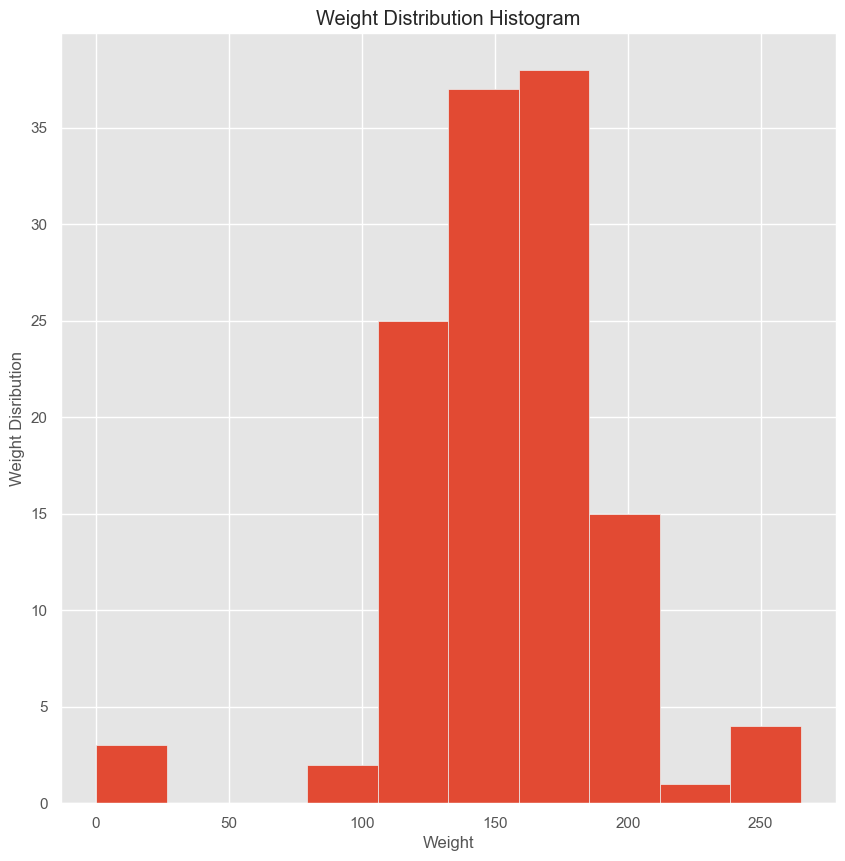

In [3260]:
# put your answer here

plt.style.use('ggplot')
plt.figure(figsize=(10, 10))
plt.hist(df['weight'])
plt.xlabel("Weight")
plt.ylabel("Weight Disribution")
plt.title("Weight Distribution Histogram")
plt.show

16. Pass a three (3) bins to the matplotlib `hist()` function to create a histogram of the distribution of values of the weight column 

(array([ 3., 89., 33.]),
 array([  0.        ,  88.33333333, 176.66666667, 265.        ]),
 <BarContainer object of 3 artists>)

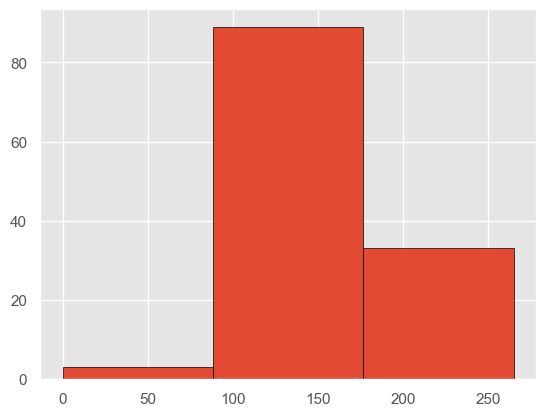

In [3261]:
bins = 3
plt.hist(df['weight'], bins=bins, edgecolor='black')

17. Use the seaborn `histplot()` function to create a histogram:

    - Create three bins **0 to 100**, 1**00 to 200**, **200 to 300**
    - Name the first bin from **0 to 100** as **Underweight**
    - Name the second bin from **0 to 100** as **Normal**
    - Name the third bin from **0 to 100** as **Overweight**

    - Set the `set_xticks()` to **0,150,250**
    - Set the `set_xticklabels()` to **"Underweight", "Normal", "Overweight"**


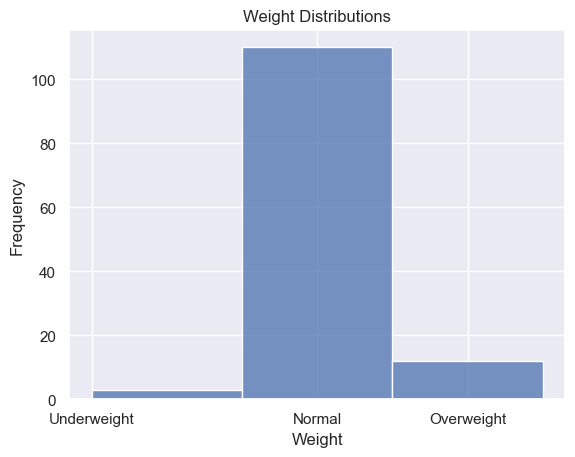

In [3262]:
sns.set()
h = sns.histplot(df['weight'], bins=[0,100,200,300])

plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Distributions')

h.set_xticks([0,150,250])
h.set_xticklabels(["Underweight", "Normal", "Overweight"])
plt.show()